In [ ]:
import sys
import os
import cv2 as cv

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from lib.masked_yolo_detector import MaskedYOLODetector

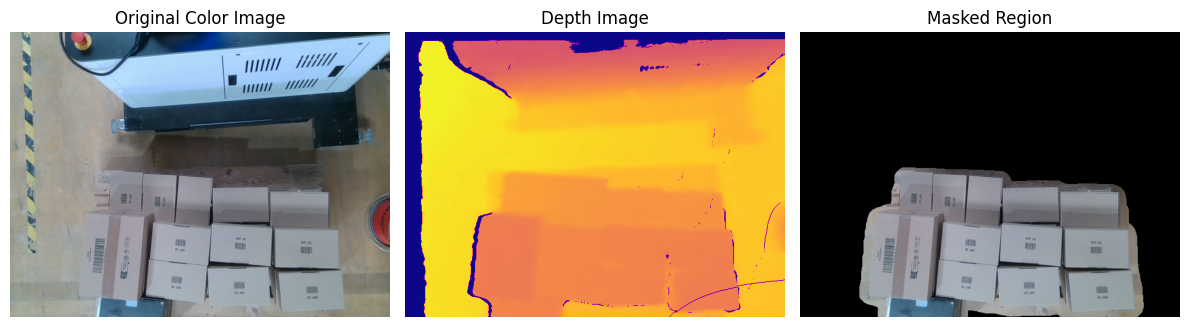


0: 480x640 4 medium_boxs, 19 small_boxs, 143.7ms
Speed: 2.0ms preprocess, 143.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


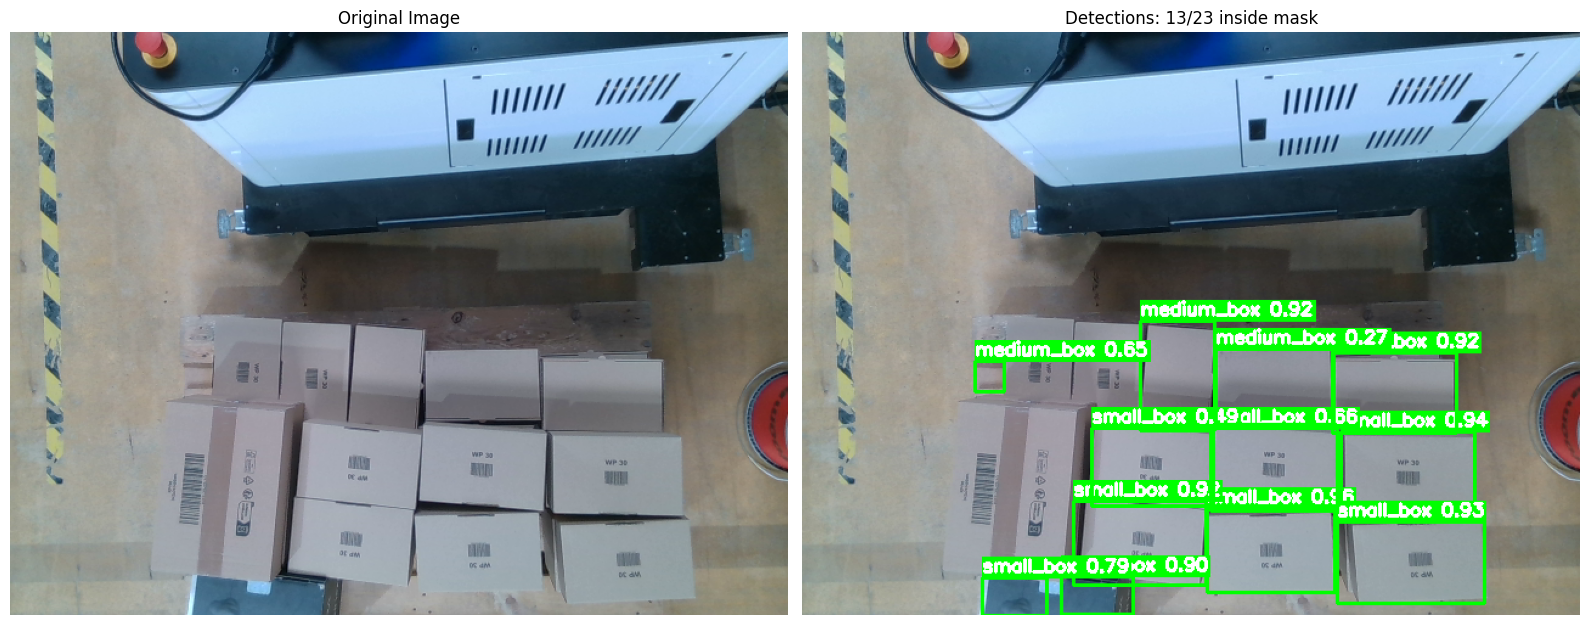

Found 13 boxes inside the mask:
Class: small_box, Confidence: 0.96, Box: (333, 392, 438, 461)
Class: small_box, Confidence: 0.94, Box: (443, 329, 553, 399)
Class: small_box, Confidence: 0.93, Box: (440, 403, 561, 470)
Class: small_box, Confidence: 0.92, Box: (223, 386, 332, 455)
Class: medium_box, Confidence: 0.92, Box: (278, 238, 339, 328)
Class: small_box, Confidence: 0.92, Box: (436, 264, 538, 330)
Class: small_box, Confidence: 0.90, Box: (213, 448, 272, 479)
Class: small_box, Confidence: 0.79, Box: (148, 449, 201, 480)
Class: small_box, Confidence: 0.66, Box: (336, 326, 440, 394)
Class: medium_box, Confidence: 0.65, Box: (142, 271, 166, 296)
Class: small_box, Confidence: 0.49, Box: (238, 326, 338, 390)
Class: small_box, Confidence: 0.30, Box: (340, 261, 436, 324)
Class: medium_box, Confidence: 0.27, Box: (340, 261, 437, 323)

Detailed mask overlap analysis:
small_box: 0.96 - Mask overlap: 100.00%
small_box: 0.94 - Mask overlap: 100.00%
small_box: 0.93 - Mask overlap: 100.00%
small_

In [ ]:
color_path="../data/small_box/color_image.png"
depth_path="../data/small_box/raw_depth.png"

color_image = cv.imread(color_path)
if color_image is None:
    raise FileNotFoundError(f"Color image not found: {color_path}")

depth_image = cv.imread(depth_path, cv.IMREAD_ANYDEPTH)
if depth_image is None:
    raise FileNotFoundError(f"Depth image not found: {depth_path}")

detector = MaskedYOLODetector(
        color_image=color_image,
        depth_image=depth_image,
        model_path="/workspace/data/model/best.pt"
    )

detector.create_mask()
detector.visualize_input()
boxes = detector.run_detection(visualize=True)
detector.print_box_details()
